# Assignment for Programming for Data Analysis

**Synthesize a data set of a real-world phenomenom and evaluate**


As my dataset for this I have chosen to look at the home and away records of each Premiership football match from the 2000-2001 season until 2017-2018 season. I will be examining the relationship between playing at home (versus away) and how it relates to goals scored and cards given.

I obtained this dataset on [Kwaggle](https://www.kaggle.com/datasets/saife245/english-premier-league). I have downloaded it as csv file to my project folder. 

This dataset contains stats from every Premier League game since the beginning of the 00-01 season. For the purposes of this project I will only be looking at 'Home goals scored', 'Away goals scored', 'Home yellow cards',  'Away yellow cards', Home red cards and away red cards


Once I understand the relationship between these factors, I will synthesize this data myself.

In [2]:
# First of all I am going to import the libraries that I will be using for this task. 

import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# I have saved the dataset in the same folder as my notebook. I am going to import it to the notebook 

footballdf = pd.read_csv('final_dataset.csv')

In [4]:
#Going to review the dataset to see it is what is expected
footballdf.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/2000,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/2000,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/2000,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/2000,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/2000,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


This dataset contains 45 different variables. For the purpose of this project I will only be looking at  'Home goals scored', 'Away goals scored', 'Home yellow cards', 'Away yellow cards', 'Home red cards' and 'Away red cards'. In the dataset these variables have the below names.

- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- HY = Home yellow cards
- AY = Away yellow cards
- HR = Home red cards
- AR = Away red cards

I will create a new dataset with just these variables.

In [55]:
prem_df = footballdf[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HY', 'AY', 'HR', 'AR']]
prem_df.info()
prem_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6840 non-null   object
 1   HomeTeam  6840 non-null   object
 2   AwayTeam  6840 non-null   object
 3   FTHG      6840 non-null   int64 
 4   FTAG      6840 non-null   int64 
 5   HY        6840 non-null   int64 
 6   AY        6840 non-null   int64 
 7   HR        6840 non-null   int64 
 8   AR        6840 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 481.1+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4,0,1,2,0,0
1,19/08/2000,Chelsea,West Ham,4,2,1,2,0,0
2,19/08/2000,Coventry,Middlesbrough,1,3,5,3,1,0
3,19/08/2000,Derby,Southampton,2,2,1,1,0,0
4,19/08/2000,Leeds,Everton,2,0,1,3,0,0


This dataframe shows the information we want. There are 6840 rows each representing one match that occurred and we can see columns showing what teams played, the goals scored for the home team (FTHG), the goals scored for the away team (FTAG), the yellow cards received for the home team (HY), the yellow cards received for the away team (AY), the red cards received for the home team (HR) and the red cards received for the away team (AR).

<BarContainer object of 1 artists>

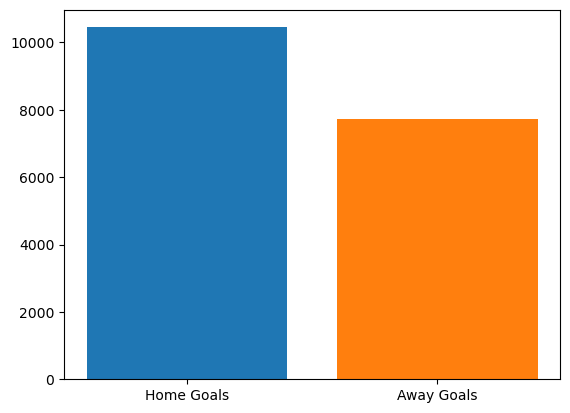

In [6]:
fig, ax = plt.subplots()

total_home_goals = prem_df['FTHG'].sum()
total_away_goals = prem_df['FTAG'].sum()

ax.bar('Home Goals', total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', total_away_goals, label = 'Away Goals')

<BarContainer object of 1 artists>

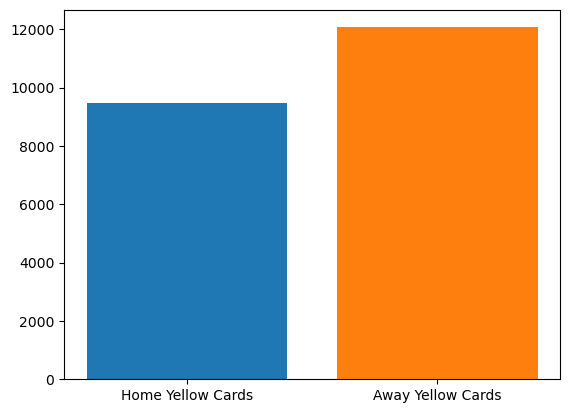

In [59]:
fig, ax = plt.subplots()

total_home_yellow = prem_df['HY'].sum()
total_away_yellow = prem_df['AY'].sum()


ax.bar('Home Yellow Cards', total_home_yellow, label = 'Home Yellow Cards')
ax.bar('Away Yellow Cards', total_away_yellow, label = 'Away Yellow Cards')


<BarContainer object of 1 artists>

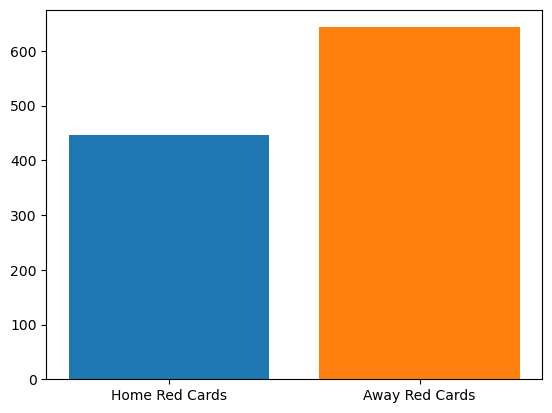

In [58]:
fig, ax = plt.subplots()

total_home_red = prem_df['HR'].sum()
total_away_red = prem_df['AR'].sum()

ax.bar('Home Red Cards', total_home_red, label = 'Home Red Cards')
ax.bar('Away Red Cards', total_away_red, label = 'Away Red Cards')

From looking at the above we can see the advantageous relationship of teams playing at home. 


In [8]:
#Calculate the average goal per game at home versus away and the average booking points at home versus away

average_home_goal = total_home_goals/6840
average_away_goal = total_away_goals/6840
average_home_bp = total_home_bp/6840
average_away_bp = total_away_bp/6840

print(average_home_goal)
print(average_away_goal)
print(average_home_bp)
print(average_away_bp)


1.527485380116959
1.1302631578947369
15.50219298245614
19.99342105263158


In [61]:
home_goals = prem_df['FTHG']
away_goals = prem_df['FTAG']

home_y = prem_df['HY']
away_y = prem_df['AY']

home_r = prem_df['HR']
away_r = prem_df['AR']



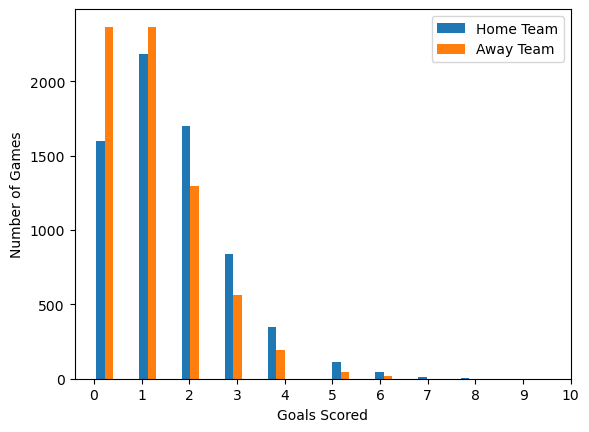

In [10]:
#Create a histogram showing the distribution of goals scored both home and away

plt.hist([home_goals, away_goals], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(0, 11))
plt.ylabel("Number of Games")
plt.xlabel("Goals Scored")
plt.legend()

From inspecting the above histogram the shape seems to fit a positive skewed distribution

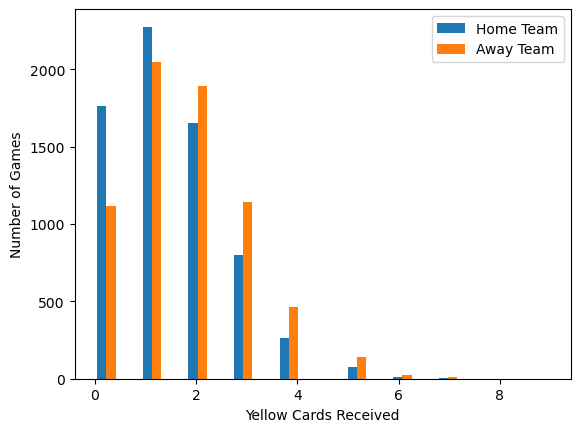

In [62]:
#Create a histogram showing the distribution of yellow cards received both home and away

plt.hist([home_y, away_y], 20, label = ['Home Team', 'Away Team'])

plt.ylabel("Number of Games")
plt.xlabel("Yellow Cards Received")
plt.legend()

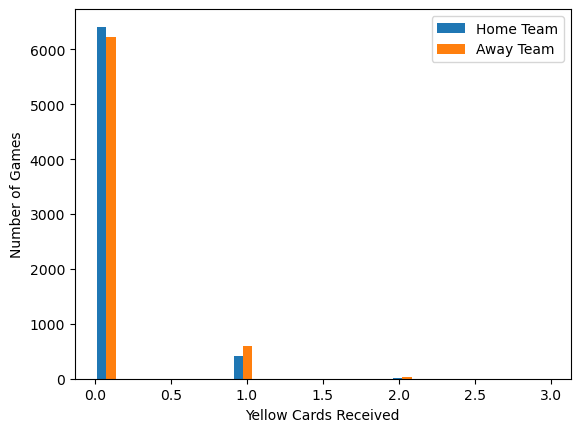

In [63]:
#Create a histogram showing the distribution of yellow cards received both home and away

plt.hist([home_r, away_r], 20, label = ['Home Team', 'Away Team'])

plt.ylabel("Number of Games")
plt.xlabel("Yellow Cards Received")
plt.legend()

When looking at the above historgrams, it looks like all of our variables follow a poisson distribution. 

["A Poisson distribution is a discrete probability distribution, meaning that it gives the probability of a discrete (i.e., countable) outcome. For Poisson distributions, the discrete outcome is the number of times an event occurs, represented by k."](https://www.scribbr.com/statistics/poisson-distribution/#:~:text=A%20Poisson%20distribution%20is%20a,the%20mean%20number%20of%20events.)

In our dataset the events taking place are the goals scored or booking points awarded.  In order to create a Poisson distribution we need to know the mean, or Lambda ( $\lambda$)

The equation for the poisson distribution is below:

$$ f(\kappa;\lambda) = \frac{\lambda^k.e^{-\lambda}}{\kappa!}$$

In [27]:
home_goals.describe()

count    6840.000000
mean        1.527485
std         1.297913
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTHG, dtype: float64

For our Variable Home_goals, we know;

- the standard deviation : 1.297913
- mean: 1.527485

We now take a look at the mean and variance (the square of the standard deviation) of goals scored. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same.

In [28]:
#Mean and Variance of home goals scored

print(f'The Mean is {home_goals.mean()}')
print(f'The Variance is {home_goals.var()}')


The Mean is 1.527485380116959
The Variance is 1.6845785565927742


While the mean and variance values aren't exactly the same they are still relatively close. Given the graphical analysis done above I think it is fair to say this variable fits within a Poisson Distribution

In [29]:
away_goals.describe()

count    6840.000000
mean        1.130263
std         1.124566
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: FTAG, dtype: float64

In [30]:
#Mean and Variance of away goals scored

print(f'The Mean is {away_goals.mean()}')
print(f'The Variance is {away_goals.var()}')

The Mean is 1.1302631578947369
The Variance is 1.2646491484597284


Again the mean and variance are close enough to fit a Poisson Distribution.

In [64]:
home_y.describe()

count    6840.000000
mean        1.386842
std         1.181844
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: HY, dtype: float64

In [66]:
#Mean and Variance of home yellow cards received

print(f'The Mean for yellow cards received by the home team is {home_y.mean()}')
print(f'While the Variance is {home_y.var()}')

The Mean for yellow cards received by the home team is 1.3868421052631579
While the Variance is 1.3967562201306858


In [67]:
away_y.describe()

count    6840.000000
mean        1.764327
std         1.278690
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: AY, dtype: float64

In [70]:
#Mean and Variance of away yellow cards received

print(f'The Mean for yellow cards received by the away team is {away_y.mean()}')
print(f'While the Variance is {away_y.var()}')

The Mean for yellow cards received by the away team is 1.764327485380117
While the Variance is 1.6350483852072715


In [77]:
#Mean and Variance of red cards received for both home and away

print(f'The Mean for red cards received by the home team is {home_r.mean()}')
print(f'While the Variance is {home_r.var()}\n')


print(f'The Mean for red cards received by the away team is {away_r.mean()}')
print(f'While the Variance is {away_r.var()}')

The Mean for red cards received by the home team is 0.06535087719298245
While the Variance is 0.0672303199144276

The Mean for red cards received by the away team is 0.09400584795321637
While the Variance is 0.0924922122775303


The mean and the variance for all of these values are almost equal. This supports the idea that they fit a Poisson distribution.

In [78]:
mean_home_goals = 1.527485
mean_away_goals = 1.130263
mean_home_y = 1.386842
mean_away_y = 1.764327
mean_home_r = 0.06535087719298245
mean_away_r = 0.09400584795321637

What do we know about the distribution of the variables so far.

#Find out the known constant mean rate for BP, and use the poisson distribution for synthesising the database with this info
find the average goals scored/bp for each match = k rng.poisson (k, 6480)

In [20]:
df1 = np.random.poisson(mean_home_goals, 6480)

#New Home Goals (NHG) generated variable
NHG = pd.DataFrame(df1)
NHG.describe()



,0
count,6480.000000
mean,1.504938
std,1.229358
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [21]:
df2 = np.random.poisson(mean_away_goals, 6480)

# New Away Goals (NAG) generated variable
NAG = pd.DataFrame(df2)
NAG.describe()

,0
count,6480.000000
mean,1.131481
std,1.047416
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


<BarContainer object of 1 artists>

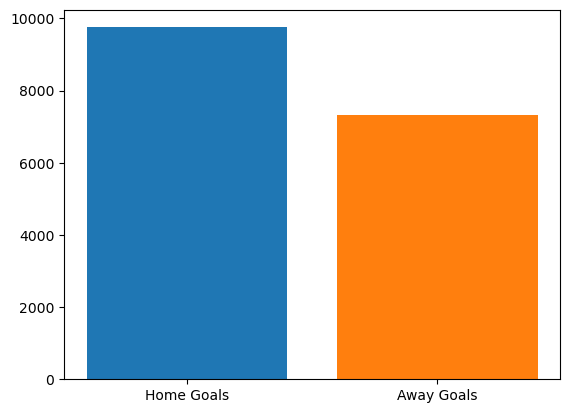

In [22]:
fig, ax = plt.subplots()

new_total_home_goals = NHG.sum()
new_total_away_goals = NAG.sum()

ax.bar('Home Goals', new_total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', new_total_away_goals, label = 'Away Goals')

In [54]:
#Create a histogram showing the distribution of goals scored both home and away
new_df = pd.concat([NHG, NAG], axis=1)
new_df.tail()

,0,0
6475,1,2
6476,6,2
6477,1,0
6478,4,0
6479,1,0


ValueError: `bins` must be 1d, when an array

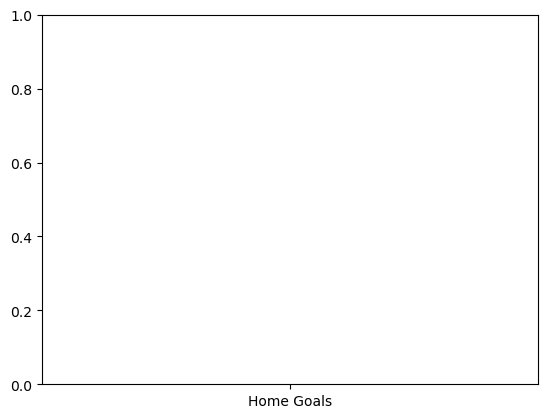

In [79]:
df3 = np.random.poisson(mean_home_y, 6480)

# New Home Yellow Cards (NHY) generated variable
NHY = pd.DataFrame(df3)
NHY.describe()

,0
count,6480.000000
mean,1.376080
std,1.153351
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [85]:
df4 = np.random.poisson(mean_away_y, 6480)

# New Away Yellow Cards (NAY) generated variable
NAY = pd.DataFrame(df4)
NAY.describe()

,0
count,6480.000000
mean,1.773148
std,1.329293
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


In [87]:
df5 = np.random.poisson(mean_home_r, 6480)

# New Home Red Cards (NHR) generated variable
NHR = pd.DataFrame(df5)
NHR.describe()

,0
count,6480.000000
mean,0.066667
std,0.254365
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [89]:
df6 = np.random.poisson(mean_away_r, 6480)

# New Away Red Cards (NAR) generated variable
NAR = pd.DataFrame(df6)
NAR.describe()

,0
count,6480.000000
mean,0.091821
std,0.303391
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


References

"We now take a look at the mean and variance (the square of the standard deviation) of Man Utd’s scoring rate. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same."

https://bookdown.org/theqdata/honors_thesis/introduction.html

## **END**